In [1]:
import os
import gymnasium as gym
import networkx as nx
from algorithm.sabre_env import SabreSwapEnv


import qiskit.qasm2
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
from qiskit.transpiler import CouplingMap

In [2]:
provider = FakeAlmadenV2()
coupling_map = CouplingMap(provider.configuration().coupling_map)

In [3]:
data_path = '../data'
file_list = os.listdir(data_path)
file_list = [f for f in file_list if f.endswith('.qasm')]

paper_file_list = [
    '4mod5-v1_22.qasm',
    'mod5mils_65.qasm',
    'alu-v0_27.qasm',
    'decod24-v2_43.qasm',
    '4gt13_92.qasm',
    'ising_model_10.qasm',
    'ising_model_13.qasm',
    'ising_model_16.qasm',
    'qft_10.qasm',
    'qft_13.qasm',
    'qft_16.qasm',
    'qft_20.qasm',
    'rd84_142.qasm',
    'adr4_197.qasm',
    'radd_250.qasm',
    'z4_268.qasm',
    'sym6_145.qasm',
    'misex1_241.qasm',
    'rd73_252.qasm',
    'cycle10_2_110.qasm',
    'square_root_7.qasm',
    'sqn_258.qasm',
    'rd84_253.qasm',
    'co14_215.qasm',
    'sym9_193.qasm',
    '9symml_195.qasm',
]
paper_file_list = [file for file in file_list if file in paper_file_list]
file_list = [f for i, f in enumerate(file_list) if i % 5 == 0]
circuits = [qiskit.qasm2.load(os.path.join(data_path, f)) for f in file_list]
print(len(file_list))

32


In [4]:
gym.register(
    id="SaberSwap-v0", entry_point="algorithm.sabre_env:SabreSwapEnv")
env = gym.make(
    id="SaberSwap-v0", circuits = circuits, coupling_map=coupling_map)

{'swap_candidate': [(9, 14), (9, 8), (12, 11), (12, 7), (12, 13), (6, 5), (6, 1), (6, 7), (10, 11), (10, 5)], 'sabre_dag': <networkx.classes.digraph.DiGraph object at 0x000002B7747D78C0>, 'current_layout': {<Qubit register=(20, "q"), index=0>: 0, <Qubit register=(20, "q"), index=1>: 1, <Qubit register=(20, "q"), index=2>: 2, <Qubit register=(20, "q"), index=3>: 3, <Qubit register=(20, "q"), index=4>: 4, <Qubit register=(20, "q"), index=5>: 5, <Qubit register=(20, "q"), index=6>: 6, <Qubit register=(20, "q"), index=7>: 7, <Qubit register=(20, "q"), index=8>: 8, <Qubit register=(20, "q"), index=9>: 9, <Qubit register=(20, "q"), index=10>: 10, <Qubit register=(20, "q"), index=11>: 11, <Qubit register=(20, "q"), index=12>: 12, <Qubit register=(20, "q"), index=13>: 13, <Qubit register=(20, "q"), index=14>: 14, <Qubit register=(20, "q"), index=15>: 15, <Qubit register=(20, "q"), index=16>: 16, <Qubit register=(20, "q"), index=17>: 17, <Qubit register=(20, "q"), index=18>: 18, <Qubit register

c:\Users\memi\Desktop\codes\circuit_opt\.venv\Lib\site-packages\gymnasium\utils\passive_env_checker.py:130: UserWarning: WARN: The obs returned by the `reset()` method was expecting a numpy array, actual type: <class 'dict'>
  logger.warn(
c:\Users\memi\Desktop\codes\circuit_opt\.venv\Lib\site-packages\gymnasium\spaces\box.py:423: UserWarning: WARN: Casting input x to numpy array.
  gym.logger.warn("Casting input x to numpy array.")
c:\Users\memi\Desktop\codes\circuit_opt\.venv\Lib\site-packages\gymnasium\utils\passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


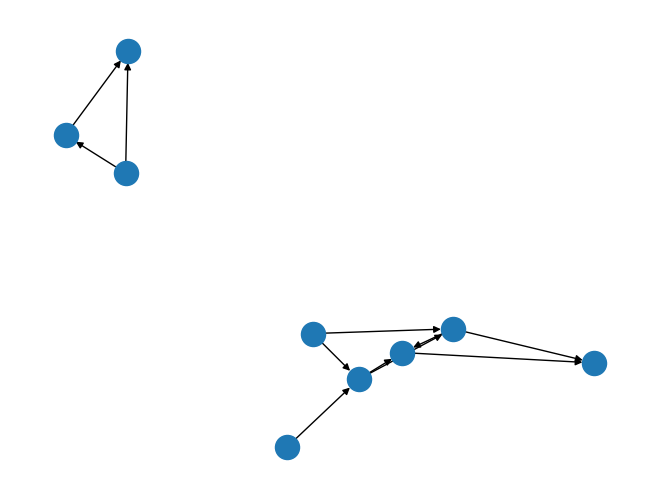

In [5]:
state, info = env.reset()
print(state)
print(info)
screen = env.render()
screen

nx.draw(state['sabre_dag'])


3.0
{'swap_candidate': [(1, 0), (1, 6), (1, 2), (3, 4), (3, 2), (3, 8)], 'sabre_dag': <qiskit._accelerate.circuit.DAGCircuit object at 0x0000021491B04160>, 'current_layout': {<Qubit register=(20, "q"), index=3>: 3, <Qubit register=(20, "q"), index=4>: 4, <Qubit register=(20, "q"), index=5>: 5, <Qubit register=(20, "q"), index=6>: 6, <Qubit register=(20, "q"), index=7>: 7, <Qubit register=(20, "q"), index=8>: 8, <Qubit register=(20, "q"), index=9>: 9, <Qubit register=(20, "q"), index=10>: 10, <Qubit register=(20, "q"), index=11>: 11, <Qubit register=(20, "q"), index=12>: 12, <Qubit register=(20, "q"), index=13>: 13, <Qubit register=(20, "q"), index=14>: 14, <Qubit register=(20, "q"), index=15>: 15, <Qubit register=(20, "q"), index=16>: 16, <Qubit register=(20, "q"), index=17>: 17, <Qubit register=(20, "q"), index=18>: 18, <Qubit register=(20, "q"), index=19>: 19, <Qubit register=(20, "q"), index=0>: 0, <Qubit register=(20, "q"), index=2>: 1, <Qubit register=(20, "q"), index=1>: 2}}


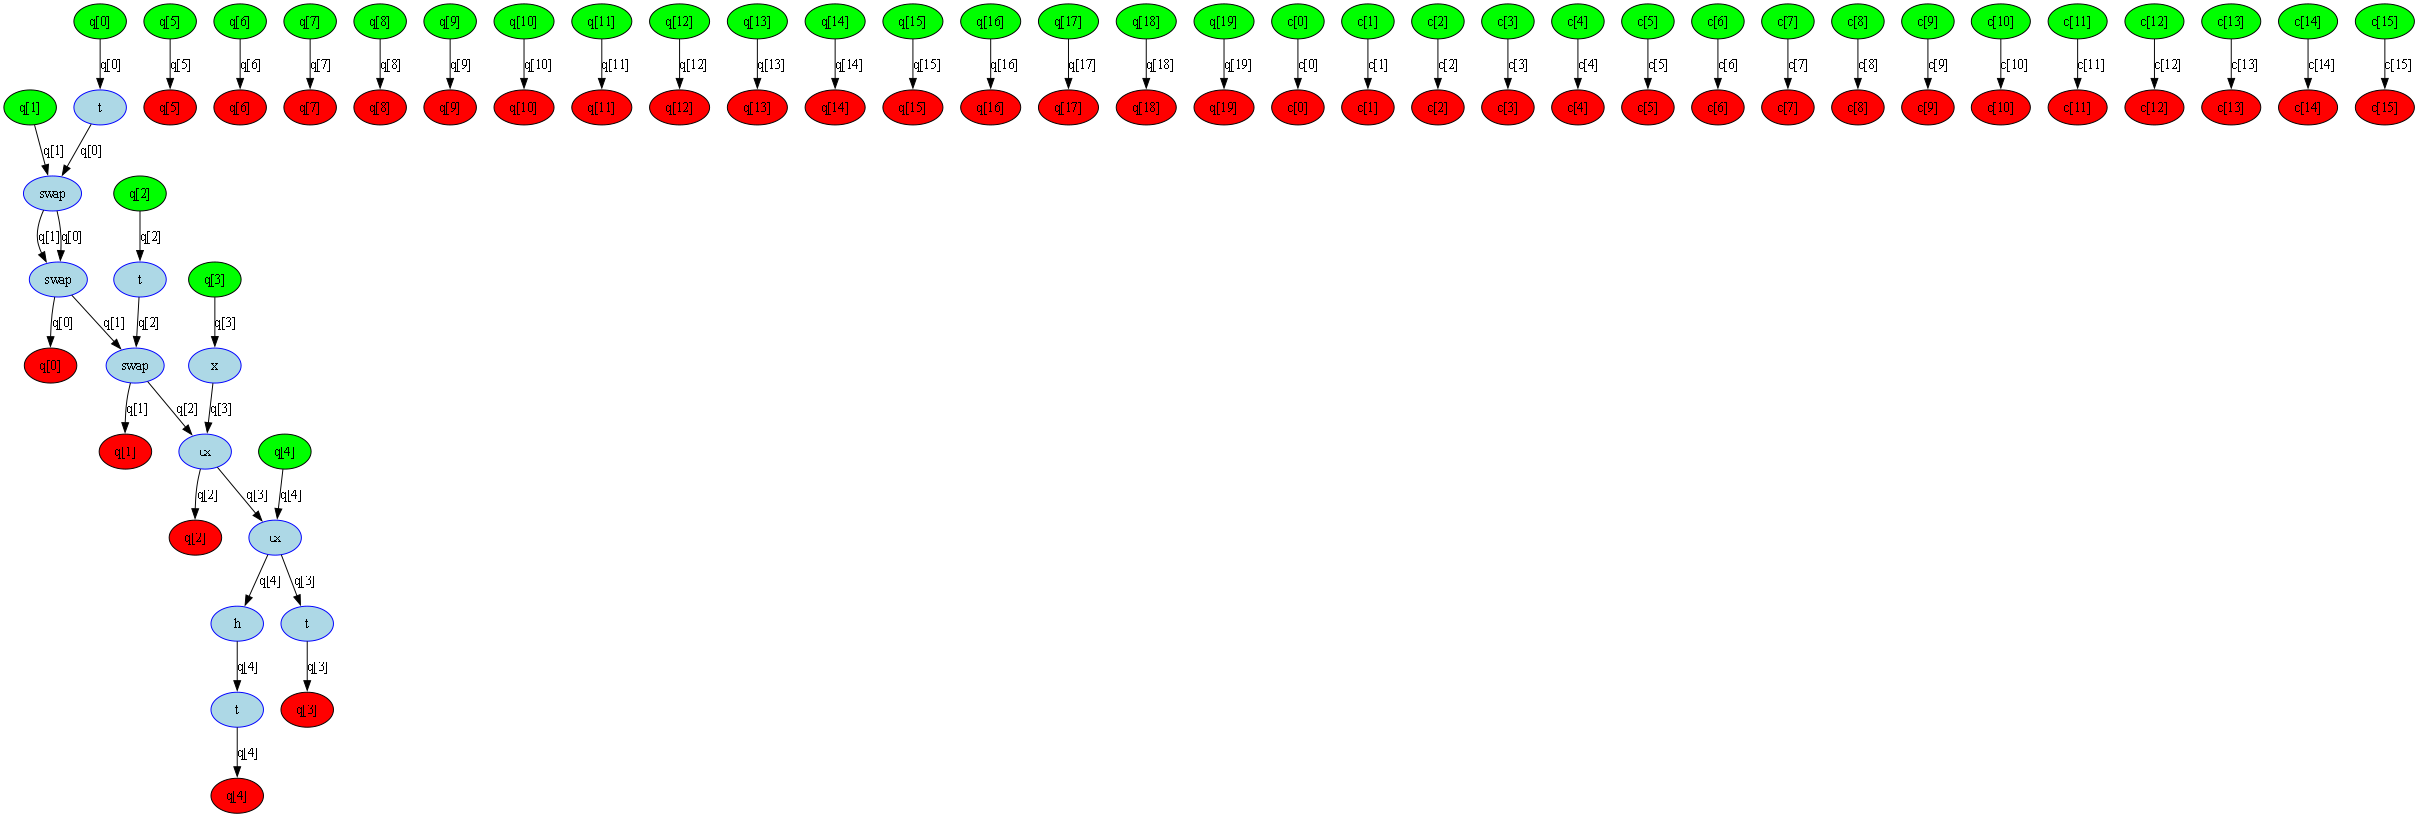

In [19]:
observation, reward, terminated, truncated, info = env.step(action=(1, 2))
print(reward)
print(observation)
screen = env.render()
screen